# Tensors & Stochastic Gradient Descent (SGD) in PyTorch

## Tensors

SGD is one of the most commonly used **optimization** algorithms for deep learning. Here is a simple demonstration of SGD for Linear Regression, one of the simplest, most commonly used and highly interpretable machine learning models.

A simple linear regression can be defined as follows,

$y=aX + b$

$a = [a_1, a_2]$

$ X = [1, 2, 3] $

### Import Libraries

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
torch.manual_seed(42); # set for reproducibility

### Generating Tensors

https://discuss.pytorch.org/t/what-is-the-difference-between-tensor-and-tensor-is-tensor-going-to-be-deprecated-in-the-future/17134/8

In [159]:
print(torch.tensor(1), '->', torch.tensor(1).dtype)
print(torch.empty(1), '->', torch.empty(1).dtype)
print(torch.FloatTensor(1), '->', torch.FloatTensor(1).dtype)
print(torch.Tensor(1), '->', torch.Tensor(1).dtype)

tensor(1) -> torch.int64
tensor([2.7767e-36]) -> torch.float32
tensor([2.7770e-36]) -> torch.float32
tensor([2.7767e-36]) -> torch.float32


> Note : Here `torch.tensor()` with a single number actually returns a scalar values whereas the other return a tensor.

### Specifying types and coercing

In [163]:
x = torch.tensor(1, dtype=torch.int32)
print(x.dtype)
y = torch.tensor(1., dtype=torch.int32)
print(y.dtype)

torch.int32
torch.int32


In [164]:
torch.tensor([1,1]).size()

torch.Size([2])

Set the number of training samples/examples and create a tensor of **n x 2** dimensions as follows,

Cannot do this with `torch.Tensor()`

In [166]:
torch.Tensor(1, dtype=torch.float32)

TypeError: ignored

For Tensors with floats, 

In [167]:
torch.FloatTensor([1, 2])

tensor([1., 2.])

Equivalently,

In [168]:
torch.tensor([1.,2]) # The dot at the end signifies all numbers are to be taken as floats.

tensor([1., 2.])

Lets verify with their data types,

In [169]:
print(torch.Tensor([1.,2]).dtype) # i.e the default datatype
torch.Tensor([1.,2]).dtype == torch.FloatTensor([1, 2]).dtype

torch.float32


True

Now lets generate a tensor with numbers drawn from a **uniform distribution**,

In [170]:
torch.rand([3,5]) # return a tensor of dimension x,y with numbers drawn from a uniform distribution U ~ [0,1)

tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904],
        [0.6009, 0.2566, 0.7936, 0.9408, 0.1332],
        [0.9346, 0.5936, 0.8694, 0.5677, 0.7411]])

To draw random variables from a uniform distribution,  
$U ~ [r1, r2]$


Replace the first column with numbers drawn from a uniform distribution 
$U ~ [0, 1)$.  
`uniform_` here does operations in inplace (anything with a 
underscore at the end means inplace)

If U is a random variable uniformly distributed on [0, 1], then (r1 - r2) * U + r2 is uniformly distributed on [r1, r2]. Alternatively, (r2 - r1) * U + r1  (https://stackoverflow.com/questions/44328530/how-to-get-a-uniform-distribution-in-a-range-r1-r2-in-pytorch)

(r1 - r2) * torch.rand(a, b) + r2 or  torch.FloatTensor(a, b).uniform_(r1, r2)

In [171]:
a = 1; b = 2; r1 = -1; r2 = 1
print((r1 - r2) * torch.rand(a, b) + r2)
print(torch.FloatTensor([a, b]).uniform_(r1, r2))

tensor([[ 0.1412, -0.7709]])
tensor([ 0.1478, -0.4668])


In [222]:
n = 10 # training samples
x = torch.ones(n,2) # Generate vector/matrix of ones
print(x.dtype) # datatype
print(x.size()) # size of tensor. Note : torch.shape is similar to torch.size()

torch.float32
torch.Size([10, 2])


In [399]:
x[:,0].uniform_(-1.,1)
print(x)

tensor([[ 0.7645,  1.0000],
        [ 0.8300,  1.0000],
        [-0.2343,  1.0000],
        [ 0.9186,  1.0000],
        [-0.2191,  1.0000],
        [ 0.2018,  1.0000],
        [-0.4869,  1.0000],
        [ 0.5873,  1.0000],
        [ 0.8815,  1.0000],
        [-0.7336,  1.0000]])


### Initializing parameters

Note : Writing a dot at the end of a integer coerces it to be a float as follows,

In [400]:
# Initializing the slope and intercept AKA the parameters, weights, coefficients
# of the equation
a = torch.tensor([3.,2]) 
print(a)

tensor([3., 2.])


As Jeremy (fast.ai), pointed out :
A very intuitive, visual resource for matrix multiplications,
> http://matrixmultiplication.xyz/

* `@` in python is an opeartor for matrix multiplication (`@=` is the inplace version)
* `*` is elementwise product between two matrices or vectors

In [401]:
print(x.size()); print(a.size())
print((x@a).size())
x@a

torch.Size([10, 2])
torch.Size([2])
torch.Size([10])


tensor([ 4.2936,  4.4900,  1.2972,  4.7558,  1.3427,  2.6054,  0.5394,  3.7618,
         4.6446, -0.2009])

Lets sample n random variables from U ~ [0,1)

In [402]:
b = torch.rand(n)
print(b)

tensor([0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666,
        0.6274])


Lets generate y from the equation of the line (linear regression),

In [403]:
y = x@a + b
print(y)

tensor([5.2282, 5.0836, 2.1666, 5.3235, 2.0838, 3.0348, 1.4249, 4.3358, 4.9112,
        0.4266])


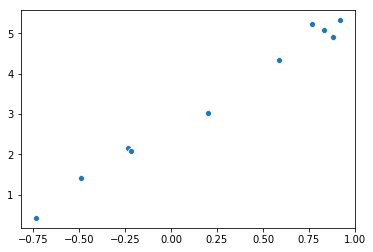

In [405]:
sns.scatterplot(x=x[:,0], y=y);

A common loss function **Mean Squared Error (MSE)** gives us a measure of how well our model is doing and is given as follows,

$\frac{sum{(y^hat-y)^2}}{n}$


In [0]:
def mse(y_hat, y): 
    
    return torch.mean((y_hat-y)**2)

In [407]:
a = torch.rand(2) # initialize the parameters
print(a)

y_hat = x@a
print(y_hat)

mse(y_hat, y)

tensor([0.2969, 0.8317])
tensor([1.0587, 1.0781, 0.7621, 1.1044, 0.7666, 0.8916, 0.6871, 1.0061, 1.0934,
        0.6139])


tensor(8.5772)

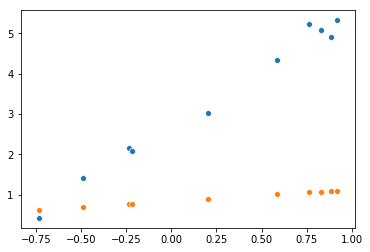

In [418]:
sns.scatterplot(x[:,0],y);
sns.scatterplot(x[:,0],y_hat);

In [410]:
a = nn.Parameter(a);
print(a)

Parameter containing:
tensor([0.2969, 0.8317], requires_grad=True)


requires_grad=True would calculate via automatic differentiation

In [0]:
def update(lr=1e-03, i=0):
    
    y_hat = x@a
    
    loss = mse(y_hat, y)
    
    if i % 10 == 0: 
        print(loss)
        
    # calculates the gradients/derivatives of the parameters; stores it in .grad
    loss.backward()
    
    with torch.no_grad(): # turn gradient calculation off
        
        a.sub_(lr * a.grad) # inplace subtraction of gradient 
        a.grad.zero_() # clear all gradients

In [412]:
# specify hyperparameters
lr = 1e-3
epochs = 100

# Training loop
for i in range(epochs): 
    update(lr, i)

tensor(8.5772, grad_fn=<MeanBackward0>)
tensor(8.2412, grad_fn=<MeanBackward0>)
tensor(7.9193, grad_fn=<MeanBackward0>)
tensor(7.6107, grad_fn=<MeanBackward0>)
tensor(7.3150, grad_fn=<MeanBackward0>)
tensor(7.0316, grad_fn=<MeanBackward0>)
tensor(6.7600, grad_fn=<MeanBackward0>)
tensor(6.4996, grad_fn=<MeanBackward0>)
tensor(6.2500, grad_fn=<MeanBackward0>)
tensor(6.0108, grad_fn=<MeanBackward0>)


In [413]:
a

Parameter containing:
tensor([0.5795, 1.2777], requires_grad=True)

Parameter containing:
tensor([0.5795, 1.2777], requires_grad=True)


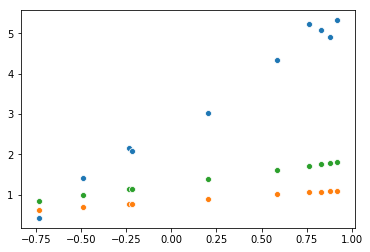

In [416]:
sns.scatterplot(x[:,0],y);
sns.scatterplot(x[:,0], y_hat);
with torch.torch.no_grad():
    print(a)
    sns.scatterplot(x[:,0], x@a);

# References
[1] fast.ai v3 Lesson 2